In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import LinearSVC
import itertools

In [145]:
oj = pd.read_csv('OJ.csv')
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [146]:
oj['target'] = list(map(lambda x : 1 if x=='CH' else -1, oj.Purchase))

In [147]:
feats = ['LoyalCH','PriceDiff']

In [148]:
red = oj[oj.target==1]
blue = oj[oj.target==-1]

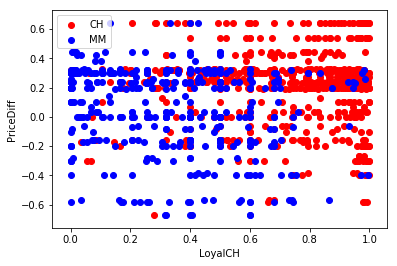

In [149]:
plt.scatter(red.LoyalCH,red.PriceDiff,c='red',label ='CH')
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='blue',label='MM')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.legend()

# Punto 1


In [255]:
oj.head()

,Unnamed: 0,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,...,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,target,temp
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,...,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1,1,(1.0374831560426703+0.11076759156093488j)
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,...,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1,1,(1.132042026769481-0.02769189789023372j)
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,...,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1,1,(1.2076891233509297+0.18461265260155815j)
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,...,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1,-1,(-0.9429242853158597+0j)
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,...,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0,1,(1.4691774965153157+0j)


In [321]:
def genNewParams(bs):
    b0 = bs[0]
    b1 = bs[1]
    b2 = bs[2]
    t0 = np.random.uniform(0,0.1)-0.05
    t1 = np.random.uniform(0,0.1)-0.05
    
#     b0 +=  np.random.uniform(0,0.1)-0.05
#     b1 += np.random.uniform(0,0.1)-0.05
    while((b0+t0)**2+(b1+t1)**2>1):
#         print('stuck in loop')
        t0 = np.random.uniform(0,0.1)-0.05
        t1 = np.random.uniform(0,0.1)-0.05
#         b0 += np.random.uniform(0,0.1)-0.05
#         b1 += np.random.uniform(0,0.1)-0.05
#     b0 += b0temp
#     b1 += b1temp
    b0 += t0
    b1 += t1
#     print(1-b1**2-b0**2)
    b2 = (1-b1**2-b0**2)**0.5
    return [b0,b1,b2]

def calcRowM(bs,index):
    return (bs[0] + bs[1]*oj.iloc[[index]]['LoyalCH'] + bs[2]*oj.iloc[[index]]['PriceDiff'])*oj.iloc[[index]]['target']
    

def M(bs):
    oj['temp'] = oj.target*(bs[0]+bs[1]*oj.LoyalCH + bs[2]*oj.PriceDiff)
    return oj.temp.min()
#     minM = np.inf
#     for i in range(len(oj)):
# #         print(float(calcRowM(bs,i)))
#         if float(calcRowM(bs,i)) < minM:
#             minM = float(calcRowM(bs,i))
#     return minM
 

In [322]:
bss=[]
bs = [0.5,0.5,0.5**0.5]
Ms = []
mejorMs = -np.inf
mejorbs =[0,0,0]
for i in range(10000):
#     print('{:.2f}%'.format(i*100/10000))
    newBs = genNewParams(bs)
#     print(newBs)
#     print(M(newBs))
#     print(M(bs))
#     print('-'[0]*100)
#     print('llega a alpha')
    alpha = np.exp(M(newBs))/np.exp(M(bs))
    r = np.random.random()
    if r<alpha:
        bs = newBs
    bss.append(bs)
    Ms.append(M(bs))
    if Ms[-1]>mejorMs:
        mejorMs=Ms[-1]
        mejorbs=bs

(array([ 258.,  600.,  871.,  957., 1436., 1487., 2038., 2054.,  246.,
          53.]),
 array([-1.43796284, -1.34054662, -1.2431304 , -1.14571418, -1.04829796,
        -0.95088174, -0.85346552, -0.7560493 , -0.65863308, -0.56121686,
        -0.46380064]),
 <a list of 10 Patch objects>)

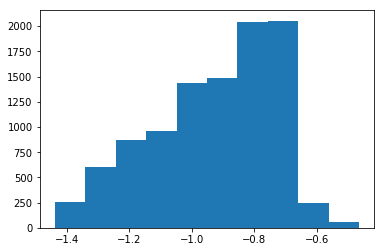

In [323]:
plt.hist(Ms)

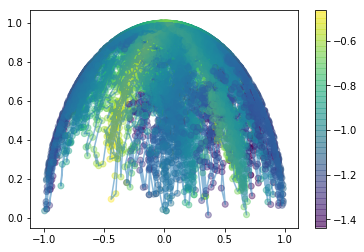

In [324]:
bss=np.array(bss)
plt.plot(bss[:,0], bss[:,2], alpha=0.5)
plt.scatter(bss[:,0], bss[:,2], alpha=0.4, c=(Ms))
plt.colorbar()

In [325]:
print(np.exp(mejorMs))
print(mejorbs)

0.6288889190745067
[-0.44309881078429775, 0.8914577237115644, 0.09469197810024442]


(-0.7, 0.7)

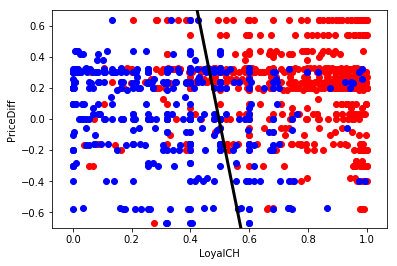

In [326]:
x = np.linspace(0,1,10)
y = (-mejorbs[1]*x-mejorbs[0])/mejorbs[2]

plt.scatter(red.LoyalCH,red.PriceDiff,c='red',label ='CH')
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='blue',label='MM')
plt.plot(x,y,c='black',linewidth=3,label='mejor recta de separación')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.xlim(-0.07,1.07)
plt.ylim(-0.7,0.7)
# plt.legend()

In [304]:
def darbs(b0,b1):
    return [b0,b1,1-b0**2-b1**2]

In [316]:
bs0 = np.linspace(-1,1,100)
bs1 = np.linspace(-1,1,100)
bss=[]
for i in bs0:
    for j in bs1:
        if (i**2+j**2)<1:
            bss.append(darbs(i,j))

maxbs = []
maxM = -np.inf
for bs in bss:
    if M(bs)>maxM:
        maxM=M(bs)
        maxbs = bs

In [317]:
print(maxbs)
print(maxM)

[-0.43434343434343425, 0.8383838383838385, 0.10845832057953264]
-0.4247720464238344


(-0.7, 0.7)

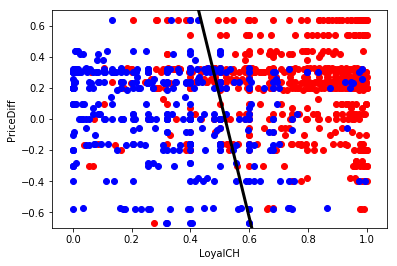

In [318]:
x = np.linspace(0,1,10)
y = (-maxbs[1]*x-maxbs[0])/maxbs[2]

plt.scatter(red.LoyalCH,red.PriceDiff,c='red',label ='CH')
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='blue',label='MM')
plt.plot(x,y,c='black',linewidth=3,label='mejor recta de separación')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.xlim(-0.07,1.07)
plt.ylim(-0.7,0.7)
# plt.legend()

# Punto 2

In [174]:
clf = LinearSVC()
clf.fit(oj[feats],oj.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [175]:
a = clf.coef_[0][0]
b = clf.coef_[0][1]
c =clf.intercept_[0]
print(a,b,c)

2.1431938820504164 0.9407053223250375 -1.0917559608966927


Tenemos que $c+ax+by=0 \Rightarrow y = \frac{-ax-c}{b}$

In [15]:
x = np.linspace(0,1,10)
y = (-a*x-c)/b

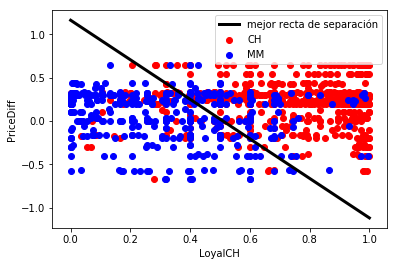

In [19]:
plt.scatter(red.LoyalCH,red.PriceDiff,c='red',label ='CH')
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='blue',label='MM')
plt.plot(x,y,c='black',linewidth=3,label='mejor recta de separación')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.legend()

# Punto 3

In [32]:
def color(x,y):
    if(c+a*x+b*y>0):
        return 'red'
    return 'blue'

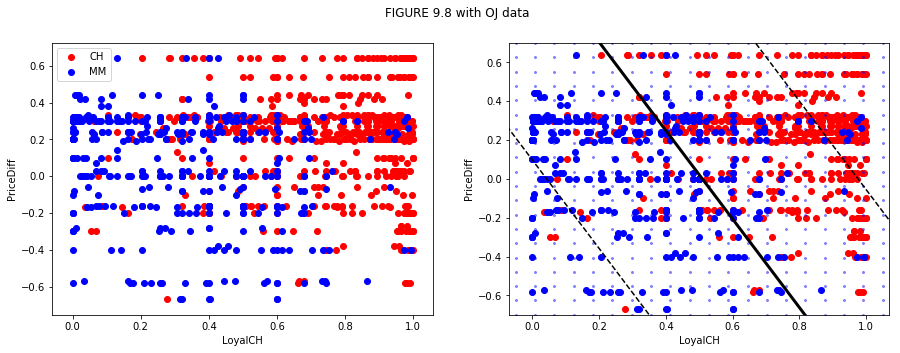

In [45]:
fig =plt.figure(figsize=(15,5))


plt.subplot(121)
plt.scatter(red.LoyalCH,red.PriceDiff,c='red',label ='CH')
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='blue',label='MM')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.legend()

plt.subplot(122)
plt.scatter(red.LoyalCH,red.PriceDiff,c='red',label ='CH')
plt.scatter(blue.LoyalCH,blue.PriceDiff,c='blue',label='MM')
plt.plot(x,y,c='black',linewidth=3,label='mejor recta de separación')
plt.xlabel('LoyalCH')
plt.ylabel('PriceDiff')
plt.xlim(-0.07,1.07)
plt.ylim(-0.7,0.7)
# plt.legend()

fig.suptitle("FIGURE 9.8 with OJ data")

for i in np.linspace(-0.05,1.05,20):
    for j in np.linspace(-0.7,0.7,20):
        plt.scatter(i,j,c=color(i,j),alpha=0.4,s=4)
        
#from http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin
plt.plot(xx,yy_down,c='black',linestyle='--')
plt.plot(xx,yy_up  ,c='black',linestyle='--')


# Parte en clase

## con sklearn

In [71]:
cars93 = pd.read_csv('Cars93.csv')

In [72]:
cars93.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [73]:
cars93['target'] = list(map(lambda x : 1 if x>np.mean(cars93['MPG.city']) else -1,cars93['MPG.city']))

In [74]:
cars93.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,target
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,1
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,-1
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,-1
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,-1
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,-1


In [75]:
feats= ['Fuel.tank.capacity',
        'Horsepower', 
        'Length',
        'Rev.per.mile',
        'Turn.circle',
        'Weight',
       ]

In [76]:
#normalize
for feat in feats:
    cars93[feat] = (cars93[feat]- np.mean(cars93[feat]))/np.std(cars93[feat])

In [77]:
clf = LinearSVC()
clf.fit(cars93[feats],cars93.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [78]:
clf.intercept_

array([-0.44232836])

In [79]:
clf.coef_

array([[-0.91177906,  0.20763775, -0.33690174,  0.22887781,  0.41038186,
        -0.76512511]])

In [80]:
def color(x,y):
    if(evaluate(x,y)>0):
        return 'red'
    return 'blue'

def evaluate(x,y):
    ans = cars93[feats[0][0]]-cars93[feats[0][0]]
    for i,feat in feats:
        ans += clf.coef_[0][i]*cars93[feat]
    ans += clf.intercept_[0]
        
    

In [81]:
possibleCombs = list(itertools.combinations(feats,r=2))
print(possibleCombs)
print(len(possibleCombs))



[('Fuel.tank.capacity', 'Horsepower'), ('Fuel.tank.capacity', 'Length'), ('Fuel.tank.capacity', 'Rev.per.mile'), ('Fuel.tank.capacity', 'Turn.circle'), ('Fuel.tank.capacity', 'Weight'), ('Horsepower', 'Length'), ('Horsepower', 'Rev.per.mile'), ('Horsepower', 'Turn.circle'), ('Horsepower', 'Weight'), ('Length', 'Rev.per.mile'), ('Length', 'Turn.circle'), ('Length', 'Weight'), ('Rev.per.mile', 'Turn.circle'), ('Rev.per.mile', 'Weight'), ('Turn.circle', 'Weight')]
15


In [82]:
red = cars93[cars93.target==1]
blue = cars93[cars93.target==-1]

['Fuel.tank.capacity' 'Horsepower' 'Length' 'Rev.per.mile' 'Turn.circle'
 'Weight']


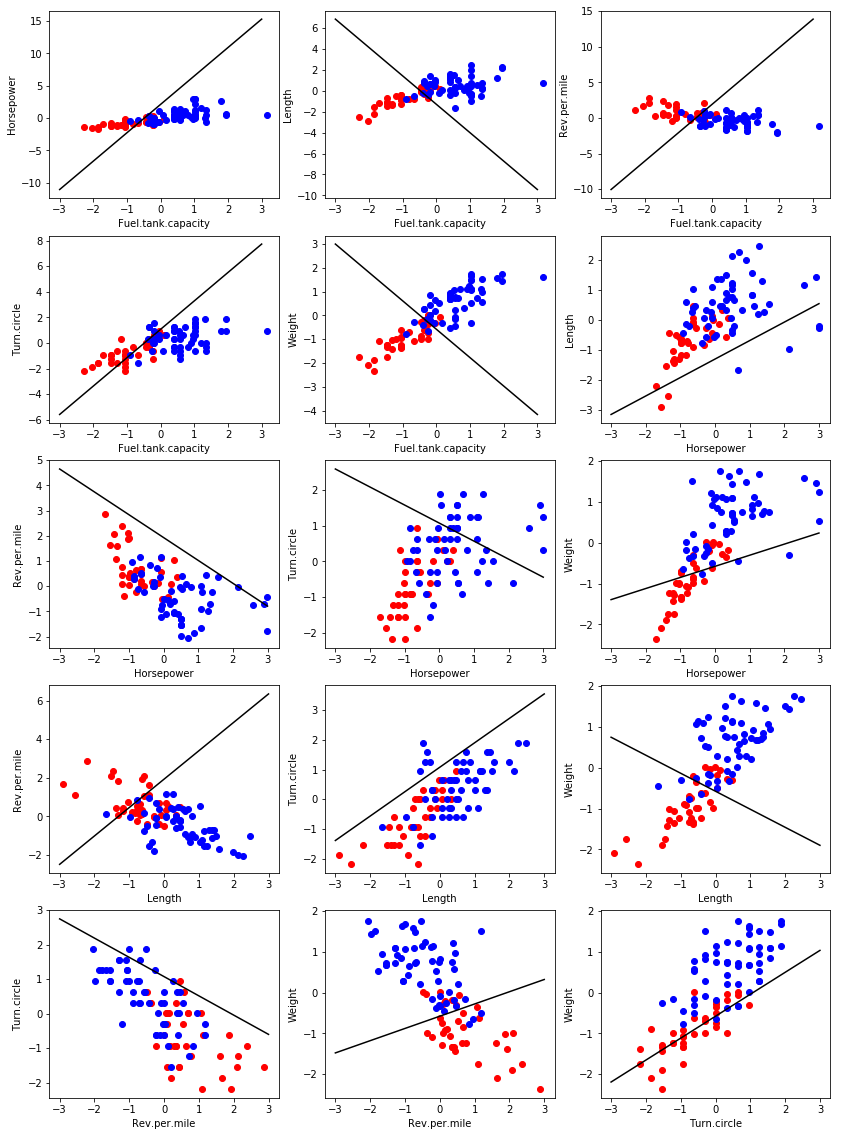

In [84]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(14, 20))
feats=np.array(feats)
print(feats)
for ax, comb in zip(axs.flat, possibleCombs):
#     ax.imshow(grid, interpolation=interp_method, cmap='viridis')
#     ax.set_title(str(interp_method))
    x=np.linspace(-3,3,2)
#     print(len(feats==comb[0]))
#     print(len(clf.coef_[0]))
    y = (-x*clf.coef_[0][feats==comb[0]]-clf.intercept_[0])/(clf.coef_[0][feats==comb[1]])
    ax.scatter(red[comb[0]],red[comb[1]],c='red',label ='CH')
    ax.scatter(blue[comb[0]],blue[comb[1]],c='blue',label='MM')
    ax.plot(x,y,c='black')
    ax.set_xlabel(comb[0])
    ax.set_ylabel(comb[1])
#     print(comb)
    

# Sin sklearn

In [103]:
def genNewParams(bs):
    b0 = bs[0]
    b1 = bs[1]
    b2 = bs[2]
    b3 = bs[3]
    b4 = bs[4]
    b5 = bs[4]
    
    t0 = np.random.uniform(0,0.1)-0.05
    t1 = np.random.uniform(0,0.1)-0.05
    t2 = np.random.uniform(0,0.1)-0.05
    t3 = np.random.uniform(0,0.1)-0.05
    t4 = np.random.uniform(0,0.1)-0.05
    t5 = np.random.uniform(0,0.1)-0.05
    
#     b0 +=  np.random.uniform(0,0.1)-0.05
#     b1 += np.random.uniform(0,0.1)-0.05
    while((b0+t0)**2+(b1+t1)**2+(b2+t2)**2+(b3+t3)**2+(b4+t4)**2+(b5+t5)**2>1):
#         print('stuck in loop')
        t0 = np.random.uniform(0,0.1)-0.05
        t1 = np.random.uniform(0,0.1)-0.05
        t2 = np.random.uniform(0,0.1)-0.05
        t3 = np.random.uniform(0,0.1)-0.05
        t4 = np.random.uniform(0,0.1)-0.05
        t5 = np.random.uniform(0,0.1)-0.05
#         b0 += np.random.uniform(0,0.1)-0.05
#         b1 += np.random.uniform(0,0.1)-0.05
#     b0 += b0temp
#     b1 += b1temp
    b0 += t0
    b1 += t1
    b2 += t2
    b3 += t3
    b4 += t4
    b5 += t5
#     print(1-b1**2-b0**2)
    b6 = (1-b1**2-b0**2-b2**2-b3**2-b4**2-b5**2)**0.5
    return [b0,b1,b2,b3,b4,b5,b6]

def calcRowM(bs,index):
    return (bs[0] + bs[1]*oj.iloc[[index]]['LoyalCH'] + bs[2]*oj.iloc[[index]]['PriceDiff'])*oj.iloc[[index]]['target']
    

def M(bs):
    cars93['temp'] = cars93.target*(bs[0]+
                                    bs[1]*cars93[feats[0]] + 
                                    bs[2]*cars93[feats[1]]+
                                    bs[3]*cars93[feats[2]]+
                                    bs[4]*cars93[feats[3]]+
                                    bs[5]*cars93[feats[4]]+
                                    bs[6]*cars93[feats[5]])
    return cars93.temp.min()
#     minM = np.inf
#     for i in range(len(oj)):
# #         print(float(calcRowM(bs,i)))
#         if float(calcRowM(bs,i)) < minM:
#             minM = float(calcRowM(bs,i))
#     return minM
 

In [106]:
bss=[]
bs = [(1/7)**0.5]*7
Ms = []
mejorMs = -np.inf
mejorbs =[0]*7
for i in range(1000):
#     print('{:.2f}%'.format(i*100/10000))
    newBs = genNewParams(bs)
#     print(newBs)
#     print(M(newBs))
#     print(M(bs))
#     print('-'[0]*100)
#     print('llega a alpha')
    alpha = np.exp(M(newBs))/np.exp(M(bs))
    r = np.random.random()
    if r<alpha:
        bs = newBs
    bss.append(bs)
    Ms.append(M(bs))
    if Ms[-1]>mejorMs:
        mejorMs=Ms[-1]
        mejorbs=bs

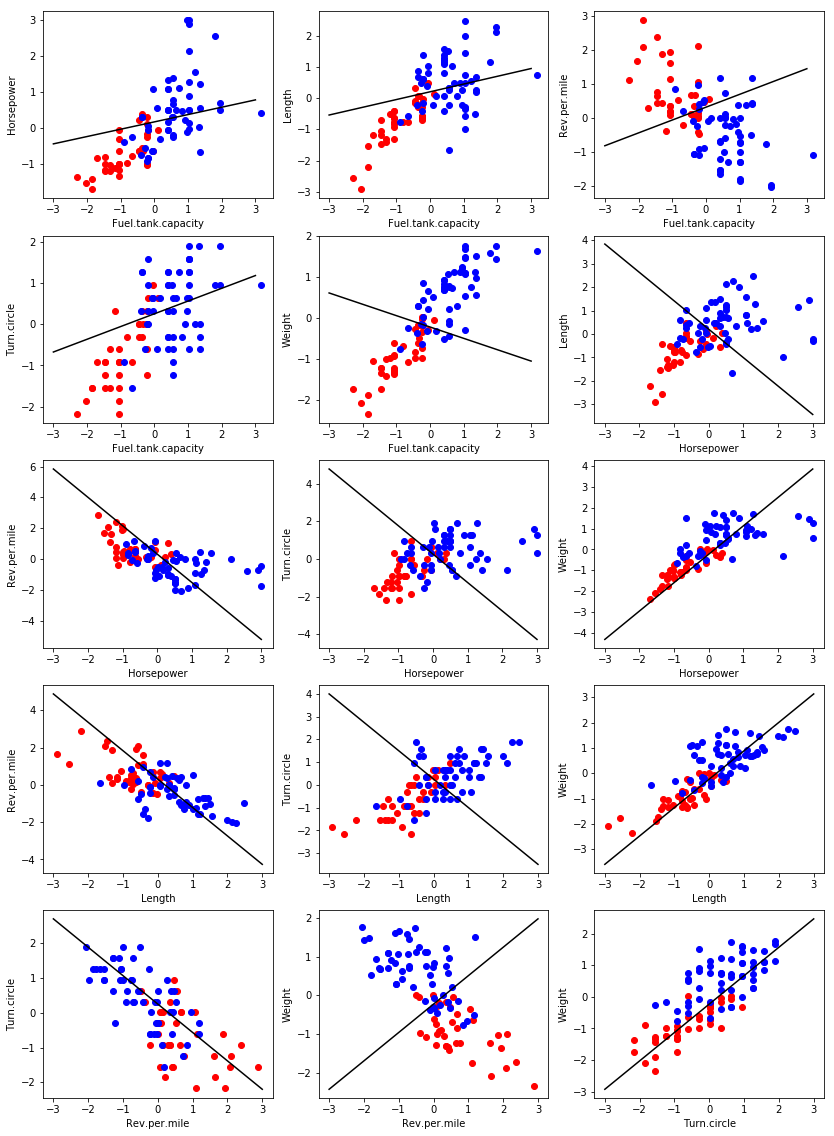

In [107]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(14, 20))
feats=np.array(feats)
feats1 = feats[1:]
intercept = mejorbs[0]
mejorbs=np.array(mejorbs[1:])
# print(feats)
# print(mejorbs)
for ax, comb in zip(axs.flat, possibleCombs):
#     ax.imshow(grid, interpolation=interp_method, cmap='viridis')
#     ax.set_title(str(interp_method))
    x=np.linspace(-3,3,2)
#     print(len(feats==comb[0]))
#     print(len(clf.coef_[0]))
#     print(feats==comb[0])
#     print(mejorbs)
    y = (-x*mejorbs[feats==comb[0]]-intercept)/(mejorbs[feats==comb[1]])
    ax.scatter(red[comb[0]],red[comb[1]],c='red',label ='CH')
    ax.scatter(blue[comb[0]],blue[comb[1]],c='blue',label='MM')
    ax.plot(x,y,c='black')
    ax.set_xlabel(comb[0])
    ax.set_ylabel(comb[1])
#     print(comb)
    